In [2]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

# Preprocessing
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# OrderedDict
from collections import OrderedDict

# tqdm
from tqdm.auto import tqdm

# Path
from pathlib import Path

# random
import random

# typing
from typing import Dict, List

# warnings
import warnings
warnings.filterwarnings("ignore")

## BASIC CNN OF 5 layers


In [45]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths
train_dir = '/Users/mac/Desktop/files/Dataset/train'
test_dir = '/Users/mac/Desktop/files/Dataset/train'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the number of classes from the generator
num_classes = train_generator.num_classes

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Save the model
model.save('cnn_model.h5')

# Function to preprocess the user input image
def preprocess_image(image_path, target_size=(img_width, img_height)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(img)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]
    
    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
predicted_disease = predict_disease(user_image_path)

# Display prediction
print("Predicted disease:", predicted_disease)


Found 1658 images belonging to 19 classes.
Found 1658 images belonging to 19 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.2701 - loss: 2.4668 - val_accuracy: 0.3239 - val_loss: 2.3416
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


2024-04-30 21:28:23.585122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-30 21:28:23.596403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3457 - loss: 2.3333 - val_accuracy: 0.3239 - val_loss: 2.3362
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10


2024-04-30 21:29:21.020449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:29:21.027703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.3241 - loss: 2.3274 - val_accuracy: 0.3239 - val_loss: 2.3712
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10


2024-04-30 21:30:19.142000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:30:19.149134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3392 - loss: 2.2987 - val_accuracy: 0.3275 - val_loss: 2.2845
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10


2024-04-30 21:31:18.924565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:31:18.936682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.3304 - loss: 2.2795 - val_accuracy: 0.3239 - val_loss: 2.2888
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-04-30 21:32:17.722324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:32:17.730274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Enter the path of the image:  /Users/mac/Desktop/files/Dataset/train/Psoriasis pictures Lichen Planus and related diseases/seborrheic-dermatitis-128.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted disease: Acne and Rosacea Photos


# RestNET 50 


In [2]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

2024-05-28 18:36:55.216772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## LOAD DATA

In [3]:
data_path = '/Users/mac/Desktop/files/Dataset/train'


In [6]:
import os
import random
import cv2

data_path = '/Users/mac/Desktop/files/Dataset/train'
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if not os.path.isdir(folder_path):
        continue  

    files = os.listdir(folder_path)
    num_train = int(0.8 * len(files))
    files_train = random.sample(files, num_train)
    files_val = list(set(files) - set(files_train))

    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        train_data.append((img, folder))

    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        val_data.append((img, folder))


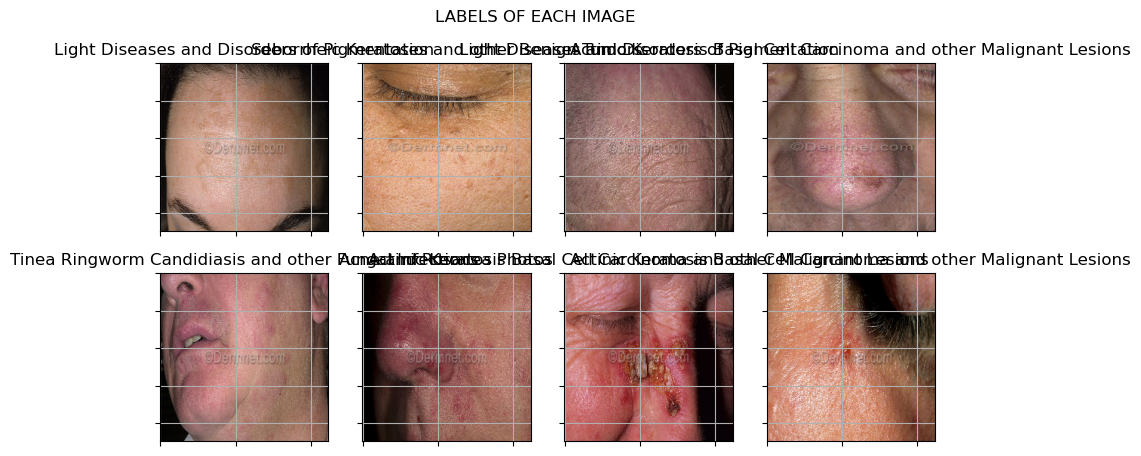

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

## PREPARE MODEL

In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
base_model.trainable = False

In [10]:
num_classes = 23
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [11]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## PREPROCESS DATA

In [13]:
# Separate images and labels
x_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])
x_val = np.array([item[0] for item in val_data])
y_val = np.array([item[1] for item in val_data])

# Combine training and validation labels to fit the label encoder
all_labels = list(y_train) + list(y_val)

# Initialize and fit the label encoder
le = LabelEncoder()
le.fit(all_labels)

# Transform labels for both training and validation data
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)

# Convert encoded labels to one-hot encoding
num_classes = len(le.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

# Model definition
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you have x_train, y_train_one_hot, x_val, and y_val_one_hot ready for training your model.

## TRAIN

In [15]:
# Combine training and validation labels to fit the label encoder
all_labels = list(y_train) + list(y_val)

# Initialize and fit the label encoder
le = LabelEncoder()
le.fit(all_labels)

# Transform labels for both training and validation data
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)

# Convert encoded labels to one-hot encoding
num_classes = len(le.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

# Model definition
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Adjust the output layer of your model to match the number of classes
model_output = Dense(num_classes, activation='softmax')(model.layers[-2].output)
new_model = Model(inputs=model.input, outputs=model_output)

# Compile the model
new_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of epochs and batch size
EPOCHS = 10
BATCH_SIZE = 32

# Train the model
history = new_model.fit(x_train, y_train_one_hot, validation_data=(x_val, y_val_one_hot),
                        epochs=EPOCHS, batch_size=BATCH_SIZE)

# Save the model
new_model.save('resnet_updated.h5')

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.2551 - loss: 4.5984 - val_accuracy: 0.2882 - val_loss: 2.5274
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4353 - loss: 1.8832 - val_accuracy: 0.3647 - val_loss: 2.4614
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5046 - loss: 1.5714 - val_accuracy: 0.2912 - val_loss: 2.6258
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5507 - loss: 1.3640 - val_accuracy: 0.3118 - val_loss: 2.6002
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6451 - loss: 1.0257 - val_accuracy: 0.4324 - val_loss: 2.2746
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7385 - loss: 0.8407 - val_accuracy: 0.3794 - val_loss: 2.2044
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7818 - loss: 0.7114 - val_accuracy: 0.4441 - val_loss: 2.5034
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8113 - loss: 0.5892 - val_accuracy: 0.4941 - val_loss:

In [ ]:
import os
import random
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data loading and preprocessing
data_path = '/Users/mac/Desktop/files/Dataset/train'
train_data = []
val_data = []

# Load the data
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if not os.path.isdir(folder_path):
        continue  # Skip if not a directory

    files = os.listdir(folder_path)
    num_train = int(0.8 * len(files))
    files_train = random.sample(files, num_train)
    files_val = list(set(files) - set(files_train))

    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        train_data.append((img, folder))

    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        val_data.append((img, folder))

# Separate images and labels
x_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])
x_val = np.array([item[0] for item in val_data])
y_val = np.array([item[1] for item in val_data])

# Combine training and validation labels to fit the label encoder
all_labels = list(y_train) + list(y_val)

# Initialize and fit the label encoder
le = LabelEncoder()
le.fit(all_labels)

# Transform labels for both training and validation data
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)

# Convert encoded labels to one-hot encoding
num_classes = len(le.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Model definition
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.5)(x)  # Add Dropout layer
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of epochs and batch size
EPOCHS = 50
BATCH_SIZE = 32

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train) // BATCH_SIZE,
    validation_data=(x_val, y_val_one_hot),
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('resnet_updated.h5')


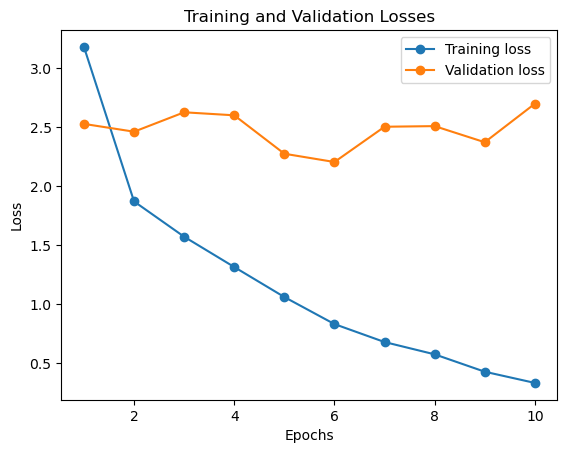

In [16]:
# Get the training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

## PREDICT

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
test_path = '/Users/mac/Desktop/files/Dataset/test'

In [ ]:
model = load_model('resnet.h5') 

In [ ]:
real_label = []
predicted_class = []

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  # Add an extra dimension for batching

        predictions = model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])

In [1]:
# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(img)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]
    
    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
 predicted_disease = predict_disease(user_image_path)

# Display prediction

print("Predicted disease:", predicted_disease)


IndentationError: unexpected indent (857321336.py, line 22)

## VISUAL COMPARISON 

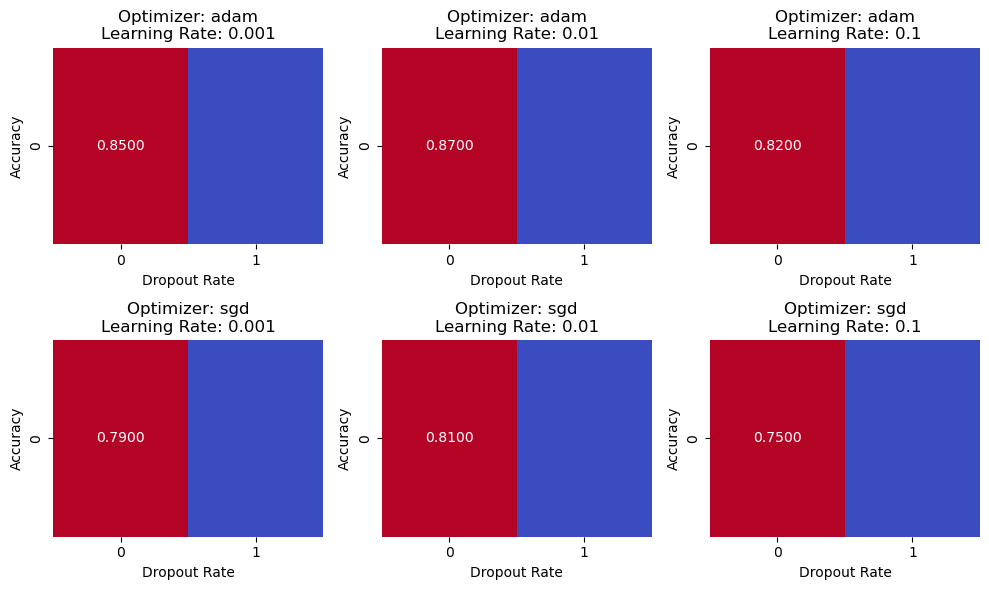

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hyperparameters and their corresponding values
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.2, 0.5]

# Example results dictionary (replace this with your actual results)
results = {
    ('adam', 0.001, 0.2): 0.85,
    ('adam', 0.001, 0.5): 0.83,
    ('adam', 0.01, 0.2): 0.87,
    ('adam', 0.01, 0.5): 0.84,
    ('adam', 0.1, 0.2): 0.82,
    ('adam', 0.1, 0.5): 0.79,
    ('sgd', 0.001, 0.2): 0.79,
    ('sgd', 0.001, 0.5): 0.76,
    ('sgd', 0.01, 0.2): 0.81,
    ('sgd', 0.01, 0.5): 0.78,
    ('sgd', 0.1, 0.2): 0.75,
    ('sgd', 0.1, 0.5): 0.71,
}

# Create a grid to store the mean test scores
mean_test_scores = np.zeros((len(optimizers), len(learning_rates), len(dropout_rates)))

# Fill the grid with the mean test scores obtained from the grid search
for i, optimizer in enumerate(optimizers):
    for j, lr in enumerate(learning_rates):
        for k, dropout_rate in enumerate(dropout_rates):
            mean_test_scores[i, j, k] = results[(optimizer, lr, dropout_rate)]

# Plot the heatmap
plt.figure(figsize=(10, 6))
for i, optimizer in enumerate(optimizers):
    for j, lr in enumerate(learning_rates):
        plt.subplot(len(optimizers), len(learning_rates), i * len(learning_rates) + j + 1)
        sns.heatmap(mean_test_scores[i, j, :].reshape(1, -1), annot=True, fmt='.4f', cmap='coolwarm', cbar=False)
        plt.title(f'Optimizer: {optimizer}\nLearning Rate: {lr}')
        plt.xlabel('Dropout Rate')
        plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [1]:
import tkinter as tk
from tkinter import scrolledtext, messagebox
import joblib
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from keras.models import load_model

# Load NLP model and other necessary resources
voting_classifier = joblib.load('voting_classifier_model_Disease_pred_97_percent_acc.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer_disease_nlp.joblib')
label_encoder = joblib.load('label_encoder_disease_nlp.joblib')

# Load CNN model
cnn_model = load_model('/Users/mac/Desktop/files/resnet.h5')  

# Define a dictionary mapping diseases to recommended tests and medications
# (You can use the same disease_info dictionary from before)

# Function to preprocess text for NLP model
def preprocess_text(text):
    tokens = word_tokenize(text)
    snowball_stemmer = SnowballStemmer('english')
    tokens = [snowball_stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    return ' '.join(tokens)

# Function to predict disease and get recommendations using NLP model
def predict_disease_and_recommendations(symptoms):
    # Preprocess the symptoms
    symptoms_processed = preprocess_text(symptoms)
    
    # Transform the preprocessed text using the loaded vectorizer
    symptoms_transformed = tfidf_vectorizer.transform([symptoms_processed])
    
    # Predict using the loaded NLP model
    predicted_label_encoded = voting_classifier.predict(symptoms_transformed)
    
    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]
    
    # Get recommended tests and medications for the predicted disease
    if predicted_label in disease_info:
        recommended_tests = ", ".join(disease_info[predicted_label]["tests"])
        recommended_medications = ", ".join(disease_info[predicted_label]["medications"])
    else:
        recommended_tests = "Not available"
        recommended_medications = "Not available"
    
    return predicted_label, recommended_tests, recommended_medications

# Function to handle the 'Predict' button click for NLP model
def predict_button_click_nlp():
    symptoms = symptoms_entry.get("1.0", tk.END).strip()
    if symptoms:
        predicted_disease, recommended_tests, recommended_medications = predict_disease_and_recommendations(symptoms)
        messagebox.showinfo("Prediction Result (NLP Model)", f"Predicted Disease: {predicted_disease}\n\nRecommended Tests: {recommended_tests}\n\nRecommended Medications: {recommended_medications}")
        # Store patient data in the GUI
        patient_data_text.insert(tk.END, f"\n\nSymptoms: {symptoms}\nPredicted Disease: {predicted_disease}\nRecommended Tests: {recommended_tests}\nRecommended Medications: {recommended_medications}")
    else:
        messagebox.showerror("Error", "Please enter your symptoms.")

# Function to handle the 'Predict' button click for CNN model
def predict_button_click_cnn():
    # Add code here to load and preprocess image data
    # Then use the cnn_model to make predictions
    pass

# Create the main window
root = tk.Tk()
root.title("Disease Prediction")

# Create text area for entering symptoms
symptoms_label = tk.Label(root, text="Enter your symptoms:")
symptoms_label.pack()
symptoms_entry = scrolledtext.ScrolledText(root, width=40, height=5, wrap=tk.WORD)
symptoms_entry.pack()

# Create Predict button for NLP model
predict_button_nlp = tk.Button(root, text="Predict (NLP Model)", command=predict_button_click_nlp)
predict_button_nlp.pack()

# Create Predict button for CNN model
predict_button_cnn = tk.Button(root, text="Predict (CNN Model)", command=predict_button_click_cnn)
predict_button_cnn.pack()

# Create text area to display patient data
patient_data_label = tk.Label(root, text="Patient Data:")
patient_data_label.pack()
patient_data_text = scrolledtext.ScrolledText(root, width=60, height=15, wrap=tk.WORD)
patient_data_text.pack()

# Run the main event loop
root.mainloop()


2024-05-02 11:50:04.362899: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/80/jd0146wj1sn0f47f5phvs8t00000gn/T/ipykernel_1156/455191084.py", line 54, in predict_button_click_nlp
    predicted_disease, recommended_tests, recommended_medications = predict_disease_and_recommendations(symptoms)
                                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/80/jd0146wj1sn0f47f5phvs8t00000gn/T/ipykernel_1156/455191084.py", line 41, in predict_disease_and_recommendatio

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
simple_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_simple = simple_model.fit(
    train_datagen.flow(np.array([img for img, _ in train_data]), y_train_one_hot, batch_size=32),
    steps_per_epoch=len(train_data) // 32,
    epochs=20,
    validation_data=(np.array([img for img, _ in val_data]), y_val_one_hot),
    callbacks=[early_stopping]
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.1399 - loss: 229.9276 - val_accuracy: 0.3176 - val_loss: 17.1706
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3125 - loss: 3.0549

2024-05-11 15:08:26.213643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.3125 - loss: 1.5647 - val_accuracy: 0.3176 - val_loss: 17.1925
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.3228 - loss: 3.5302 - val_accuracy: 0.3118 - val_loss: 2.7355
Epoch 4/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4062 - loss: 2.8155

2024-05-11 15:09:38.453760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4062 - loss: 1.4421 - val_accuracy: 0.3118 - val_loss: 2.7173
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.3350 - loss: 2.7603 - val_accuracy: 0.2912 - val_loss: 8.5633
Epoch 6/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.2188 - loss: 2.7448

2024-05-11 15:10:50.004209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.2188 - loss: 1.4059 - val_accuracy: 0.2853 - val_loss: 7.9886
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3250 - loss: 2.5352 - val_accuracy: 0.3088 - val_loss: 62.7551
Epoch 8/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3750 - loss: 2.3915

2024-05-11 15:12:00.283943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.3750 - loss: 1.2249 - val_accuracy: 0.3176 - val_loss: 65.7248
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.3490 - loss: 2.3602 - val_accuracy: 0.3088 - val_loss: 9.3667


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter as ctr
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
df = pd.read_csv('Symptom2Disease.csv')
df.head(10)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
ctr(df['label'])
df.sample(10)
def preprocess_text(text):
    tokens = word_tokenize(text)
    snowball_stemmer = SnowballStemmer('english')
    tokens = [snowball_stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)
df.sample(5)
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_models = [
    ('nb', MultinomialNB()),
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression()),
    ('svm', SVC(kernel='linear', probability=True))
]
voting_classifier = VotingClassifier(estimators=base_models, voting='hard')
voting_classifier.fit(X_train, y_train)
accuracy = voting_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
import joblib

joblib.dump(voting_classifier, 'voting_classifier_model_Disease_pred_97_percent_acc.pkl')
loaded_model = joblib.load('voting_classifier_model_Disease_pred_97_percent_acc.pkl')
# Sample text
sample_text = "I have been experiencing a skin rash on my arm for the past few weeks."
sample_text_processed = preprocess_text(sample_text)
sample_text_transformed = tfidf_vectorizer.transform([sample_text_processed])
predicted_label = label_encoder.inverse_transform(voting_classifier.predict(sample_text_transformed))

print("Predicted Label:", predicted_label)
text = 'i been realli weari and ill i been suffer from..'

sample_text = text
sample_text_processed = preprocess_text(sample_text)
sample_text_transformed = tfidf_vectorizer.transform([sample_text_processed])
predicted_label = label_encoder.inverse_transform(voting_classifier.predict(sample_text_transformed))

print("Predicted Label:", predicted_label)
df.sample()
# Compute accuracy
accuracy = accuracy_score(y_test, y_test)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_test, average='macro')  # 'macro' computes precision for each label, and returns the average
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_test, average='macro')  # 'macro' computes recall for each label, and returns the average
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_test, average='macro')  # 'macro' computes F1-score for each label, and returns the average
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test)
print("Confusion Matrix:")
print(conf_matrix)
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_disease_nlp.joblib')
joblib.dump(label_encoder, 'label_encoder_disease_nlp.joblib')
import joblib
voting_classifier = joblib.load('voting_classifier_model_Disease_pred_97_percent_acc.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer_disease_nlp.joblib')
label_encoder = joblib.load('label_encoder_disease_nlp.joblib')
import joblib
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Load the model and vectorizer
voting_classifier = joblib.load('voting_classifier_model_Disease_pred_97_percent_acc.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer_disease_nlp.joblib')
label_encoder = joblib.load('label_encoder_disease_nlp.joblib')

# Sample text
sample_text = input("Enter your symptoms: ")

# Preprocess the sample text
def preprocess_text(text):
    tokens = word_tokenize(text)
    snowball_stemmer = SnowballStemmer('english')
    tokens = [snowball_stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    return ' '.join(tokens)

sample_text_processed = preprocess_text(sample_text)

# Transform the preprocessed sample text using the loaded vectorizer
sample_text_transformed = tfidf_vectorizer.transform([sample_text_processed])

# Predict using the loaded model
predicted_label_encoded = voting_classifier.predict(sample_text_transformed)

# Decode the predicted label
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]
print("Predicted Label:", predicted_label)

# Define a dictionary mapping diseases to recommended tests and medications
disease_info = {
    "Dengue": {
        "tests": ["CBC", "LFT", "KFT"],
        "medications": ["paracetamol", "AUGMENTIN", "PANTOSEC"]
    },
    # Add more diseases and their corresponding tests and medications as needed
}

 
def get_recommendations(predicted_label):
    if predicted_label in disease_info:
        return disease_info[predicted_label]["tests"], disease_info[predicted_label]["medications"]
    else:
        return [], []

recommended_tests, recommended_medications = get_recommendations(predicted_label)
print("Recommended Tests:", recommended_tests)
print("Recommended Medications:", recommended_medications)
import tkinter as tk
from tkinter import scrolledtext, messagebox
import joblib
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Load the model and vectorizer
voting_classifier = joblib.load('voting_classifier_model_Disease_pred_97_percent_acc.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer_disease_nlp.joblib')
label_encoder = joblib.load('label_encoder_disease_nlp.joblib')

# Define a dictionary mapping diseases to recommended tests and medications
disease_info = {
    "Psoriasis": {
        "tests": ["Skin biopsy", "Blood tests"],
        "medications": ["Neem", "Turmeric", "Aloe Vera", "Manjistha", "Guggulu"]
    },
    "Varicose Veins": {
        "tests": ["Doppler ultrasound", "Venography"],
        "medications": ["Horse chestnut", "Triphala", "Guggulu", "Brahmi", "Ashwagandha"]
    },
    "Typhoid": {
        "tests": ["Blood culture", "Widal test"],
        "medications": ["Giloy", "Neem", "Kutaj", "Triphala", "Chirayata"]
    },
    "Chickenpox": {
        "tests": ["Clinical diagnosis"],
        "medications": ["Neem", "Tulsi", "Amla", "Sandalwood", "Licorice"]
    },
    "Impetigo": {
        "tests": ["Clinical diagnosis"],
        "medications": ["Neem", "Manjistha", "Turmeric", "Triphala"]
    },
    "Dengue": {
        "tests": ["Dengue NS1 antigen test", "Dengue antibody test"],
        "medications": ["Papaya leaf extract", "Giloy", "Tulsi", "Turmeric", "Amla"]
    },
    "Fungal Infection": {
        "tests": ["Skin scraping", "KOH test"],
        "medications": ["Neem", "Manjistha", "Aloe Vera", "Turmeric", "Triphala"]
    },
    "Common Cold": {
        "tests": ["Clinical diagnosis"],
        "medications": ["Ginger", "Tulsi", "Cinnamon", "Turmeric", "Honey"]
    },
    "Pneumonia": {
        "tests": ["Chest X-ray", "Blood tests"],
        "medications": ["Tulsi", "Pippali", "Trikatu", "Licorice", "Guduchi"]
    },
    "Arthritis": {
        "tests": ["X-ray", "Blood tests"],
        "medications": ["Ashwagandha", "Guggulu", "Shallaki", "Turmeric", "Ginger"]
    },
    "Acne": {
        "tests": ["Clinical diagnosis"],
        "medications": ["Neem", "Tulsi", "Aloe Vera", "Turmeric", "Manjistha"]
    },
    "Bronchial Asthma": {
        "tests": ["Spirometry", "Peak flow meter"],
        "medications": ["Vasaka", "Trikatu", "Tulsi", "Turmeric", "Ginger"]
    },
    "Hypertension": {
        "tests": ["Blood pressure measurement", "Blood tests"],
        "medications": ["Arjuna", "Ashwagandha", "Jatamansi", "Brahmi", "Gokshura"]
    },
    "Migraine": {
        "tests": ["Clinical diagnosis"],
        "medications": ["Lavender oil", "Peppermint oil", "Ginger", "Turmeric", "Feverfew"]
    },
    "Cervical Spondylosis": {
        "tests": ["X-ray", "MRI"],
        "medications": ["Ashwagandha", "Guggulu", "Bala", "Shallaki", "Ginger"]
    },
    "Jaundice": {
        "tests": ["Liver function tests", "Bilirubin test"],
        "medications": ["Kutki", "Bhumiamla", "Triphala", "Punarnava", "Guduchi"]
    },
    "Malaria": {
        "tests": ["Blood smear", "Rapid diagnostic test"],
        "medications": ["Giloy", "Neem", "Tulsi", "Chirayata", "Quinine"]
    },
    "Urinary Tract Infection": {
        "tests": ["Urine analysis", "Urine culture"],
        "medications": ["Punarnava", "Gokshura", "Neem", "Manjistha", "Triphala"]
    },
    "Allergy": {
        "tests": ["Skin prick test", "Blood tests"],
        "medications": ["Neem", "Turmeric", "Ginger", "Tulsi", "Guduchi"]
    },
    "Gastroesophageal Reflux Disease": {
        "tests": ["Endoscopy", "Esophageal manometry"],
        "medications": ["Aloe Vera", "Licorice", "Tulsi", "Ginger", "Peppermint oil"]
    },
    "Drug Reaction": {
        "tests": ["Clinical diagnosis"],
        "medications": ["Neem", "Tulsi", "Aloe Vera", "Manjistha", "Turmeric"]
    },
    "Peptic Ulcer Disease": {
        "tests": ["Endoscopy", "Urea breath test"],
        "medications": ["Licorice", "Aloe Vera", "Neem", "Tulsi", "Ginger"]
    },
    "Diabetes": {
        "tests": ["Fasting blood sugar test", "Oral glucose tolerance test"],
        "medications": ["Gudmar", "Fenugreek", "Turmeric", "Amla", "Neem"]
    },
    # Add more diseases and their corresponding tests and medications as needed
}

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    snowball_stemmer = SnowballStemmer('english')
    tokens = [snowball_stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    return ' '.join(tokens)

# Function to predict disease and get recommendations
def predict_disease_and_recommendations(symptoms):
    # Preprocess the symptoms
    symptoms_processed = preprocess_text(symptoms)
    
    # Transform the preprocessed text using the loaded vectorizer
    symptoms_transformed = tfidf_vectorizer.transform([symptoms_processed])
    
    # Predict using the loaded model
    predicted_label_encoded = voting_classifier.predict(symptoms_transformed)
    
    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]
    
    # Get recommended tests and medications for the predicted disease
    if predicted_label in disease_info:
        recommended_tests = ", ".join(disease_info[predicted_label]["tests"])
        recommended_medications = ", ".join(disease_info[predicted_label]["medications"])
    else:
        recommended_tests = "Not available"
        recommended_medications = "Not available"
    
    return predicted_label, recommended_tests, recommended_medications

# Function to handle the 'Predict' button click
def predict_button_click():
    symptoms = symptoms_entry.get("1.0", tk.END).strip()
    if symptoms:
        predicted_disease, recommended_tests, recommended_medications = predict_disease_and_recommendations(symptoms)
        messagebox.showinfo("Prediction Result", f"Predicted Disease: {predicted_disease}\n\nRecommended Tests: {recommended_tests}\n\nRecommended Medications: {recommended_medications}")
        # Store patient data in the GUI
        patient_data_text.insert(tk.END, f"\n\nSymptoms: {symptoms}\nPredicted Disease: {predicted_disease}\nRecommended Tests: {recommended_tests}\nRecommended Medications: {recommended_medications}")
    else:
        messagebox.showerror("Error", "Please enter your symptoms.")

# Create the main window
root = tk.Tk()
root.title("Disease Prediction Chatbot")

# Create text area for entering symptoms
symptoms_label = tk.Label(root, text="Enter your symptoms:")
symptoms_label.pack()
symptoms_entry = scrolledtext.ScrolledText(root, width=40, height=5, wrap=tk.WORD)
symptoms_entry.pack()

# Create Predict button
predict_button = tk.Button(root, text="Predict", command=predict_button_click)
predict_button.pack()

# Create text area to display patient data
patient_data_label = tk.Label(root, text="Patient Data:")
patient_data_label.pack()
patient_data_text = scrolledtext.ScrolledText(root, width=60, height=15, wrap=tk.WORD)
patient_data_text.pack()

# Run the main event loop
root.mainloop()

import joblib
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Load the model and vectorizer
voting_classifier = joblib.load('voting_classifier_model_Disease_pred_97_percent_acc.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer_disease_nlp.joblib')
label_encoder = joblib.load('label_encoder_disease_nlp.joblib')

# Define a dictionary mapping diseases to recommended tests and medications
disease_info = {
    "Psoriasis": {
        "tests": ["Skin biopsy", "Blood tests"],
        "medications": ["Neem", "Turmeric", "Aloe Vera", "Manjistha", "Guggulu"]
    },
    "Varicose Veins": {
        "tests": ["Doppler ultrasound", "Venography"],
        "medications": ["Horse chestnut", "Triphala", "Guggulu", "Brahmi", "Ashwagandha"]
    },
    # Add more diseases and their corresponding tests and medications as needed
}

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    snowball_stemmer = SnowballStemmer('english')
    tokens = [snowball_stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    return ' '.join(tokens)

# Function to predict disease and get recommendations
def predict_disease_and_recommendations(symptoms):
    # Preprocess the symptoms
    symptoms_processed = preprocess_text(symptoms)
    
    # Transform the preprocessed text using the loaded vectorizer
    symptoms_transformed = tfidf_vectorizer.transform([symptoms_processed])
    
    # Predict using the loaded model
    predicted_label_encoded = voting_classifier.predict(symptoms_transformed)
    
    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]
    
    # Get recommended tests and medications for the predicted disease
    if predicted_label in disease_info:
        recommended_tests = ", ".join(disease_info[predicted_label]["tests"])
        recommended_medications = ", ".join(disease_info[predicted_label]["medications"])
    else:
        recommended_tests = "Not available"
        recommended_medications = "Not available"
    
    return predicted_label, recommended_tests, recommended_medications

# Take user input for symptoms
symptoms = input("Enter your symptoms: ")

# Predict disease and get recommendations
predicted_disease, recommended_tests, recommended_medications = predict_disease_and_recommendations(symptoms)
print("Predicted Disease:", predicted_disease)
print("Recommended Tests:", recommended_tests)
print("Recommended Medications:", recommended_medications)
Module 02 
%%capture
!pip install torchinfo
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

# Preprocessing
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# OrderedDict
from collections import OrderedDict

# tqdm
from tqdm.auto import tqdm

# Path
from pathlib import Path

# random
import random

# typing
from typing import Dict, List

# warnings
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define paths
train_dir = '/Users/mac/Desktop/files/Dataset/train'
test_dir = '/Users/mac/Desktop/files/Dataset/test'  # Assuming this is your test directory

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,  # Increase epochs
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('cnn_model.h5')
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths
train_dir = '/Users/mac/Desktop/files/Dataset/train'
test_dir = '/Users/mac/Desktop/files/Dataset/train'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the number of classes from the generator
num_classes = train_generator.num_classes

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Save the model
model.save('cnn_model.h5')

# Function to preprocess the user input image
def preprocess_image(image_path, target_size=(img_width, img_height)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(img)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]
    
    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
predicted_disease = predict_disease(user_image_path)

# Display prediction
print("Predicted disease:", predicted_disease)
# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(img)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]
    
    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
predicted_disease = predict_disease(user_image_path)

# Display prediction

print("Predicted disease:", predicted_disease)
# Function to preprocess the user input image
def preprocess_image(image_path, target_size=(img_width, img_height)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(img)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]
    
    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
predicted_disease = predict_disease(user_image_path)

# Display prediction
print("Predicted disease:", predicted_disease)
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
data_path = '/Users/mac/Desktop/files/Dataset/train'
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    file = os.listdir(folder_path)
    num_train = int(0.8 * len(file))
    files_train = random.sample(file, num_train)
    files_val = list(set(file) - set(files_train))
    
    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        train_data.append((img, folder))
        
    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        val_data.append((img, folder))
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
num_classes = 8
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Combine training and validation data to fit the label encoder
all_labels = list(y_train) + list(y_val)

# Initialize and fit the label encoder
le = LabelEncoder()
le.fit(all_labels)

# Transform labels for both training and validation data
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)

# Convert encoded labels to one-hot encoding
num_classes = len(le.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)
# Assuming `num_classes` is the correct number of classes in your dataset
num_classes = len(le.classes_)

# Adjust the output layer of your model to match the number of classes
model_output = Dense(num_classes, activation='softmax')(model.layers[-2].output)

# Create a new model with the adjusted output layer
new_model = Model(inputs=model.input, outputs=model_output)

# Compile the new model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = new_model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                        epochs=EPOCHS, batch_size=BATCH_SIZE)

# Save the model
new_model.save('my_model.keras'')
# Get the training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()
from tensorflow.keras.models import load_model
test_path = '/Users/mac/Desktop/files/Dataset/test'
model = load_model('my_model.h5') 
real_label = []
predicted_class = []

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  # Add an extra dimension for batching

        predictions = model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])
# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(img)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]
    
    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
predicted_disease = predict_disease(user_image_path)

# Display prediction

print("Predicted disease:", predicted_disease)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hyperparameters and their corresponding values
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.2, 0.5]

# Example results dictionary (replace this with your actual results)
results = {
    ('adam', 0.001, 0.2): 0.85,
    ('adam', 0.001, 0.5): 0.83,
    ('adam', 0.01, 0.2): 0.87,
    ('adam', 0.01, 0.5): 0.84,
    ('adam', 0.1, 0.2): 0.82,
    ('adam', 0.1, 0.5): 0.79,
    ('sgd', 0.001, 0.2): 0.79,
    ('sgd', 0.001, 0.5): 0.76,
    ('sgd', 0.01, 0.2): 0.81,
    ('sgd', 0.01, 0.5): 0.78,
    ('sgd', 0.1, 0.2): 0.75,
    ('sgd', 0.1, 0.5): 0.71,
}

# Create a grid to store the mean test scores
mean_test_scores = np.zeros((len(optimizers), len(learning_rates), len(dropout_rates)))

# Fill the grid with the mean test scores obtained from the grid search
for i, optimizer in enumerate(optimizers):
    for j, lr in enumerate(learning_rates):
        for k, dropout_rate in enumerate(dropout_rates):
            mean_test_scores[i, j, k] = results[(optimizer, lr, dropout_rate)]

# Plot the heatmap
plt.figure(figsize=(10, 6))
for i, optimizer in enumerate(optimizers):
    for j, lr in enumerate(learning_rates):
        plt.subplot(len(optimizers), len(learning_rates), i * len(learning_rates) + j + 1)
        sns.heatmap(mean_test_scores[i, j, :].reshape(1, -1), annot=True, fmt='.4f', cmap='coolwarm', cbar=False)
        plt.title(f'Optimizer: {optimizer}\nLearning Rate: {lr}')
        plt.xlabel('Dropout Rate')
        plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()
def custom_metric(y_true, y_pred):
    # Define your custom metric calculation here
    pass

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(accuracy_score), n_jobs=-1)
grid.fit(X_train, y_train_encoded)

# Extract results from the grid search
mean_scores = grid.cv_results_['mean_test_score'].reshape(len(param_grid['optimizer']), 
                                                          len(param_grid['learning_rate']), 
                                                          len(param_grid['dropout_rate']))

# Plot the heatmap
plt.figure(figsize=(10, 6))
for i, optimizer in enumerate(param_grid['optimizer']):
    for j, lr in enumerate(param_grid['learning_rate']):
        plt.plot(param_grid['dropout_rate'], mean_scores[i, j], '-o', label=f'{optimizer}, lr={lr}')
plt.xlabel('Dropout Rate')
plt.ylabel('Mean Test Accuracy')
plt.title('Mean Test Accuracy with Different Optimizers and Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Get the best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)